* Bagımlı değişken(y) kategorik bir değişkendir.
* Elde edilen değerler 1-0 arasında olur.

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [7]:
df = pd.read_csv("../df_cleaned.csv")

In [8]:
df.head()

,BRCA1,BRCA2,MLPA,MLPApositivity,BRCAstates,OtherMutation,Diagnosis,LeftRightBreast,AgeGroups,Age45,...,Menopause,MenopauseStatus,DogumKontrolHapi,OralContraceptive,InfertiltyTherapy,EstrogenProgesteronUse,TamoxifenNolvadexUse,Radiation,Spor,BRCAstatesNew
0,0,0,1,0,0,0,5,0,1,0,...,-1.0,2,2,0,0,1,0,0,0,0
1,1,0,1,0,1,0,4,-1,3,1,...,-1.0,2,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,1,-1,-1,-1,...,-1.0,1,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,1,-1,1,0,...,-1.0,1,0,0,0,0,0,0,2,0
4,0,0,1,0,0,0,1,-1,2,0,...,-1.0,1,2,1,0,0,0,0,1,0


Model & Tahmin

In [9]:
df["BRCAstatesNew"].value_counts()

BRCAstatesNew
0    2758
1     227
2     174
4     150
5       7
6       4
3       2
Name: count, dtype: int64

In [10]:
y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_test_scaled = scaler.fit_transform(X_test) ----> büyük hatadır, veri sızıntısına sebep olur, öğrenme test verisine bakarak da yapılır bunu yapmamalısın, x_test için sadece transform
loj_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000).fit(X_train_scaled,y_train)
# multinomial degilse yani 2den fazla classı yoksa solver=liblinear uygundur


In [13]:
loj_model.intercept_
#modelimiz 7 sınıf içeriyor
#model ilk sınıf için istekli ama diğerleri için değil, dengesiz bir dağılım söz konusu olabikir

array([ 7.42106294, -0.50254804, -0.85013531, -1.62325887, -0.98141691,
       -1.74440375, -1.71930007])

In [14]:
loj_model.coef_
# her sınıftaki özelliklerin sıra ile katsayısını verir, pozitif olması o özelliğin o sınıfa olan aitliği artırdıgını, negatif olması ise azalttıgını ifade eder

array([[-1.34760753e+00, -8.63643309e-01, -4.98460079e-02,
        -4.86567258e-02, -9.58569347e-01, -1.32506553e+00,
        -4.44038552e-02, -5.48981544e-02,  4.50328427e-02,
        -8.16204856e-03,  5.50567426e-02,  6.68647478e-03,
         5.92241645e-03, -1.47871053e-02, -7.23591072e-02,
         3.36288447e-02,  5.66046054e-02,  6.37963177e-02,
         2.10285744e-02, -4.33296188e-03, -4.78713678e-02,
        -3.25454537e-02, -5.81737970e-03,  1.38301620e-02,
         4.36843280e-02,  1.60665608e-02,  3.13639227e-02,
         3.06093150e-03, -6.70435808e-02,  2.18202538e-02,
        -3.15761416e-02, -5.47141602e-02,  2.74421090e-02,
        -1.53330264e-02, -3.14686315e-02, -6.08939292e-02,
         1.00063688e-02, -5.28466164e-02, -8.09604248e-02,
        -6.48239629e-03,  6.17723312e-04, -1.17148158e-04,
         2.94375830e-03,  1.86381145e-02,  7.02538609e-02,
        -2.24663885e-02,  2.98367086e-02, -8.94181952e-03,
         2.40672174e-03,  3.62029241e-02,  4.14002467e-0

In [15]:
y_pred = loj_model.predict(X_test_scaled)

In [16]:
confusion_matrix(y_test, y_pred)

array([[828,   0,   0,   0,   0,   0,   0],
       [  0,  68,   0,   0,   0,   0,   0],
       [  0,   0,  52,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  45,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   1]], dtype=int64)

In [17]:
accuracy_score(y_test, y_pred)

0.9979939819458375

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       0.99      1.00      0.99        68
           2       1.00      1.00      1.00        52
           3       0.00      0.00      0.00         1
           4       0.98      1.00      0.99        45
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00       997
   macro avg       0.85      0.79      0.81       997
weighted avg       1.00      1.00      1.00       997



C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [19]:
#loj_model.predict_proba(X_train_scaled)[0:10]

In [20]:
'''
binary targeet için 
logit_roc_auc = roc_auc_score(y, loj_model.predict(X_train_scaled))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X_train_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()
eğri altında kalan alana bakıyoruz
'''

"\nbinary için\nlogit_roc_auc = roc_auc_score(y, loj_model.predict(X_train_scaled))\nfpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X_train_scaled)[:,1])\nplt.figure()\nplt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)\nplt.plot([0, 1], [0, 1], 'r--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver operating characteristic')\nplt.legend(loc='lower right')\nplt.savefig('Log_ROC')\nplt.show()\neğri altında kalan alana bakıyoruz\n"

### Cross Validation

In [25]:
loj_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000).fit(X_train_scaled,y_train)

cross_val_score(loj_model, X_test_scaled, y_test, cv = 2).mean()

C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


0.9959879598554539

C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       0.99      1.00      0.99        68
           2       1.00      1.00      1.00        52
           3       0.00      0.00      0.00         1
           4       0.98      1.00      0.99        45
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00       997
   macro avg       0.85      0.79      0.81       997
weighted avg       1.00      1.00      1.00       997



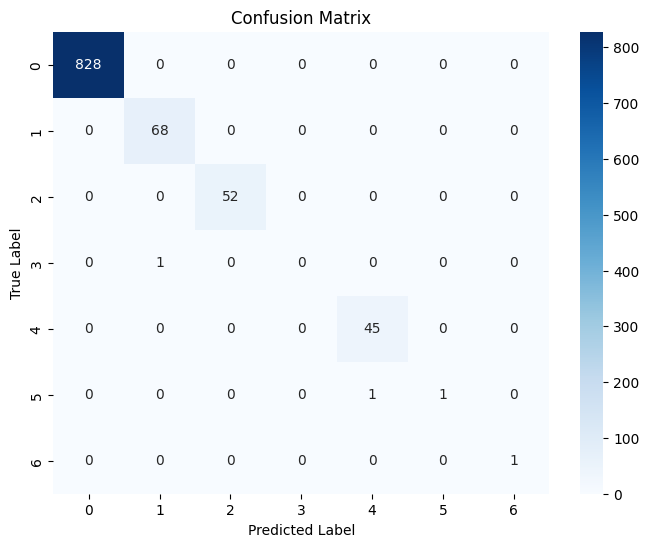

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = loj_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

labels = sorted(y_test.unique()) 

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()